In [15]:
import numpy as np
from sklearn.metrics import classification_report

# Matriz de Confusión
conf_matrix = np.array([[35, 3],
                        [2, 56]])

# Extraer los valores
TP = conf_matrix[0, 0]  # Verdaderos Positivos
FP = conf_matrix[0, 1]  # Falsos Positivos
FN = conf_matrix[1, 0]  # Falsos Negativos
TN = conf_matrix[1, 1]  # Verdaderos Negativos
print(f'TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}')


TP: 35, FP: 3, FN: 2, TN: 56


In [16]:
# Crear etiquetas verdaderas (y_true)
y_true = np.array([1] * TP + [0] * FP + [1] * FN + [0] * TN)

# Crear predicciones (y_pred)
y_pred = np.array([1] * TP + [1] * FP + [0] * FN + [0] * TN)

In [17]:
# Verificar la longitud
print(f'Longitud de y_true: {len(y_true)}')
print(f'Longitud de y_pred: {len(y_pred)}')


Longitud de y_true: 96
Longitud de y_pred: 96


In [18]:
# Generar reporte automático con sklearn
print("\nReporte con sklearn:")
print(classification_report(y_true, y_pred, target_names=['Clase 0', 'Clase 1']))


Reporte con sklearn:
              precision    recall  f1-score   support

     Clase 0       0.97      0.95      0.96        59
     Clase 1       0.92      0.95      0.93        37

    accuracy                           0.95        96
   macro avg       0.94      0.95      0.95        96
weighted avg       0.95      0.95      0.95        96



In [19]:
print(f'Longitud de y_true: {len(y_true)}')
print(f'Longitud de y_pred: {len(y_pred)}')


Longitud de y_true: 96
Longitud de y_pred: 96


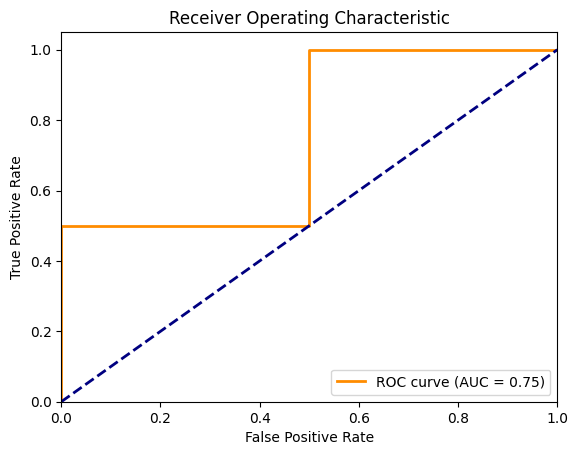

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Supongamos que tienes las probabilidades de predicción de tu modelo para la clase positiva
y_score = [0.1, 0.4, 0.35, 0.8]  # ejemplo
y_true_binary = [0, 0, 1, 1]     # etiquetas reales

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true_binary, y_score)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Caso 2 Matriz 3x3


Reporte para clasificación multiclase (3x3) con sklearn:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        43
           1       0.95      0.95      0.95        59
           2       0.95      0.96      0.96       111

    accuracy                           0.93       213
   macro avg       0.92      0.91      0.91       213
weighted avg       0.93      0.93      0.93       213



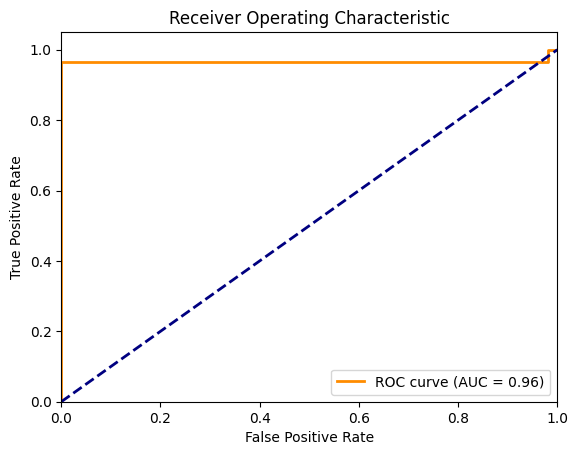

AUC: 0.96


In [28]:
import numpy as np
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Definir la matriz de confusión 3x3
conf_matrix_3x3 = np.array([[35, 3, 5],
                             [2, 56, 1],
                             [4, 0, 107]])

# Construir y_true
y_true_multiclass = [0]*35 + [0]*3 + [0]*5 + \
                    [1]*2 + [1]*56 + [1]*1 + \
                    [2]*4 + [2]*0 + [2]*107

# Construir y_pred
y_pred_multiclass = [0]*35 + [1]*3 + [2]*5 + \
                    [0]*2 + [1]*56 + [2]*1 + \
                    [0]*4 + [2]*107

# Generar reporte automático con sklearn
print("\nReporte para clasificación multiclase (3x3) con sklearn:")
print(classification_report(y_true_multiclass, y_pred_multiclass))

# Graficar la curva ROC y calcular AUC
# Para calcular la curva ROC, se necesitan probabilidades
y_scores = [0.9]*35 + [0.8]*3 + [0.7]*5 + \
           [0.1]*2 + [0.95]*56 + [0.5]*1 + \
           [0.2]*4 + [0.99]*107

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true_multiclass, y_scores, pos_label=2)  # Usando clase 2 como positiva
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Mostrar el AUC
print(f'AUC: {roc_auc:.2f}')
